In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rc("figure", dpi=150)
mpl.rc("figure", figsize=(4,4))

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'xtick.labelsize':15,
    'ytick.labelsize':15,
    'axes.labelsize':20,
})

import os

In [2]:
# extra stuff
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
import math
from scipy.spatial import cKDTree  # For finding nearest neighbors

# formatting
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  # Sets limits for when to use scientific notation

In [3]:
# List all files in the current directory
dir = '../data.lbm/attempt 03/'
# os.listdir(dir)

# Partícula

In [4]:
particleDf = pd.read_csv(dir+"particlesTrj.csv")
particleDf

,tick,time,particleId,position_x,position_y,velocity_x,velocity_y,angularVelocity
0,0,0.000000,1,-1.000000,0.000000e+00,0.000000,0.000000e+00,0.01
1,10,0.080160,1,-0.999930,1.535014e-20,0.000043,3.236502e-19,0.01
2,20,0.160321,1,-0.999860,8.280429e-20,0.000037,1.267630e-18,0.01
3,30,0.240481,1,-0.999790,1.932821e-19,0.000027,1.860989e-18,0.01
4,40,0.320641,1,-0.999720,3.595393e-19,0.000024,2.400406e-18,0.01
...,...,...,...,...,...,...,...,...
744,7440,59.639279,1,-0.901512,1.397751e-16,0.001757,7.992797e-18,0.01
745,7450,59.719439,1,-0.901371,1.403433e-16,0.001759,6.821988e-18,0.01
746,7460,59.799599,1,-0.901230,1.408359e-16,0.001759,5.373991e-18,0.01
747,7470,59.879760,1,-0.901089,1.411582e-16,0.001755,2.432904e-18,0.01


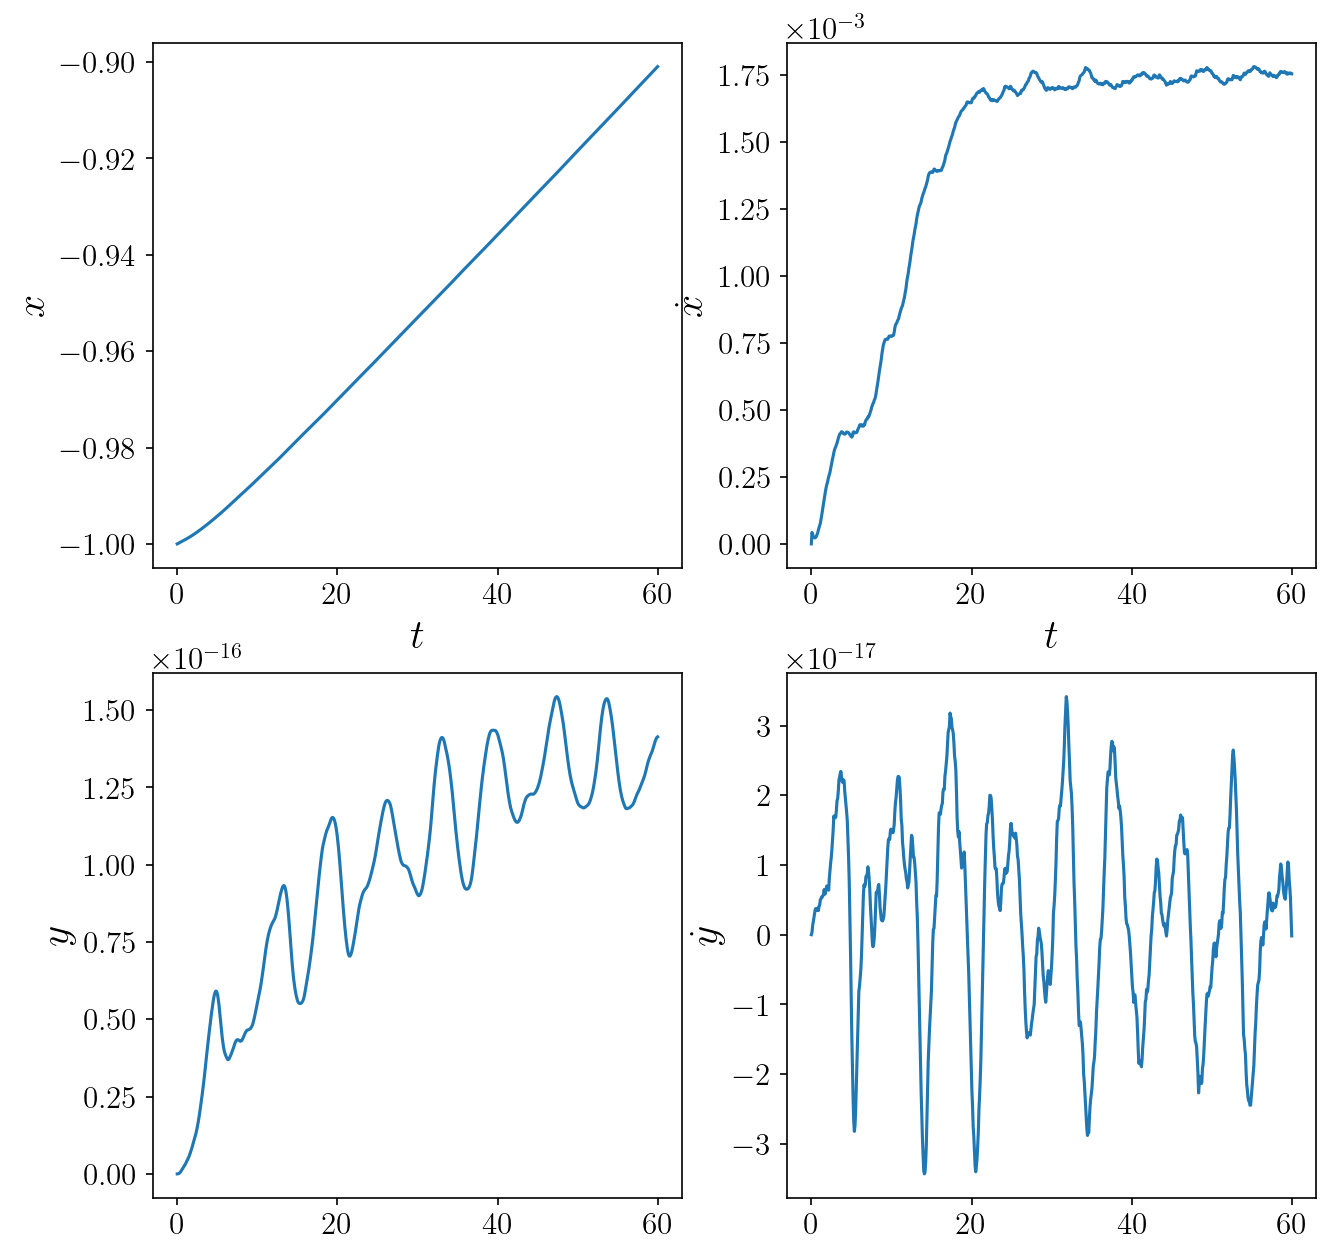

In [5]:
fig, axes = plt.subplots(2,2, figsize = (10,10))

axes[0,0].plot(particleDf.time, particleDf.position_x)
axes[0,0].set_ylabel("$x$")

axes[0,1].plot(particleDf.time, particleDf.velocity_x)
axes[0,1].set_ylabel("$\\dot{x}$")

axes[1,0].plot(particleDf.time, particleDf.position_y)
axes[1,0].set_ylabel("$y$")

axes[1,1].plot(particleDf.time, particleDf.velocity_y)
axes[1,1].set_ylabel("$\\dot{y}$")

for i in range(len(axes)):
    ax = axes.flatten()[i]
    ax.set_xlabel("$t$")
    ax.yaxis.set_major_formatter(formatter)

plt.show()

# Fluido al inicio

In [29]:
tick = particleDf.tick.values[1]
fluidDf = pd.read_csv(dir + f"fluidTrj_{tick}.csv").set_index(["id_x","id_y"]).sort_index()

fluidDf

tick     time  coordinate_x  coordinate_y  massDensity  \
id_x id_y                                                           
1    1       10  0.08016          -2.0     -2.000000          1.0   
     2       10  0.08016          -2.0     -1.991984          1.0   
     3       10  0.08016          -2.0     -1.983968          1.0   
     4       10  0.08016          -2.0     -1.975952          1.0   
     5       10  0.08016          -2.0     -1.967936          1.0   
...         ...      ...           ...           ...          ...   
500  496     10  0.08016           2.0      1.967936          1.0   
     497     10  0.08016           2.0      1.975952          1.0   
     498     10  0.08016           2.0      1.983968          1.0   
     499     10  0.08016           2.0      1.991984          1.0   
     500     10  0.08016           2.0      2.000000          1.0   

           fluidVelocity_x  fluidVelocity_y        f1        f2        f3  \
id_x id_y                                                                   
1    1                 0.0              0.0  0.444444  0.111111  0.111111   
     2                 0.0              0.0  0.444444  0.111111  0.111111   
     3                 0.0              0.0  0.444444  0.111111  0.111111   
     4                 0.0              0.0  0.444444  0.111111  0.111111   
     5                 0.0              0.0  0.444444  0.111111  0.111111   
...                    ...              ...       ...       ...       ...   
500  496               0.0              0.0  0.444444  0.111111  0.111111   
     497               0.0              0.0  0.444444  0.111111  0.111111   
     498               0.0              0.0  0.444444  0.111111  0.111111   
     499               0.0              0.0  0.444444  0.111111  0.111111   
     500               0.0              0.0  0.444444  0.111111  0.111111   

                 f4        f5        f6        f7        f8        f9  
id_x id_y                                                              
1    1     0.111111  0.111111  0.027778  0.027778  0.027778  0.027778  
     2     0.111111  0.111111  0.027778  0.027778  0.027778  0.027778  
     3     0.111111  0.111111  0.027778  0.027778  0.027778  0.027778  
     4     0.111111  0.111111  0.027778  0.027778  0.027778  0.027778  
     5     0.111111  0.111111  0.027778  0.027778  0.027778  0.027778  
...             ...       ...       ...       ...       ...       ...  
500  496   0.111111  0.111111  0.027778  0.027778  0.027778  0.027778  
     497   0.111111  0.111111  0.027778  0.027778  0.027778  0.027778  
     498   0.111111  0.111111  0.027778  0.027778  0.027778  0.027778  
     499   0.111111  0.111111  0.027778  0.027778  0.027778  0.027778  
     500   0.111111  0.111111  0.027778  0.027778  0.027778  0.027778  

[250000 rows x 16 columns]

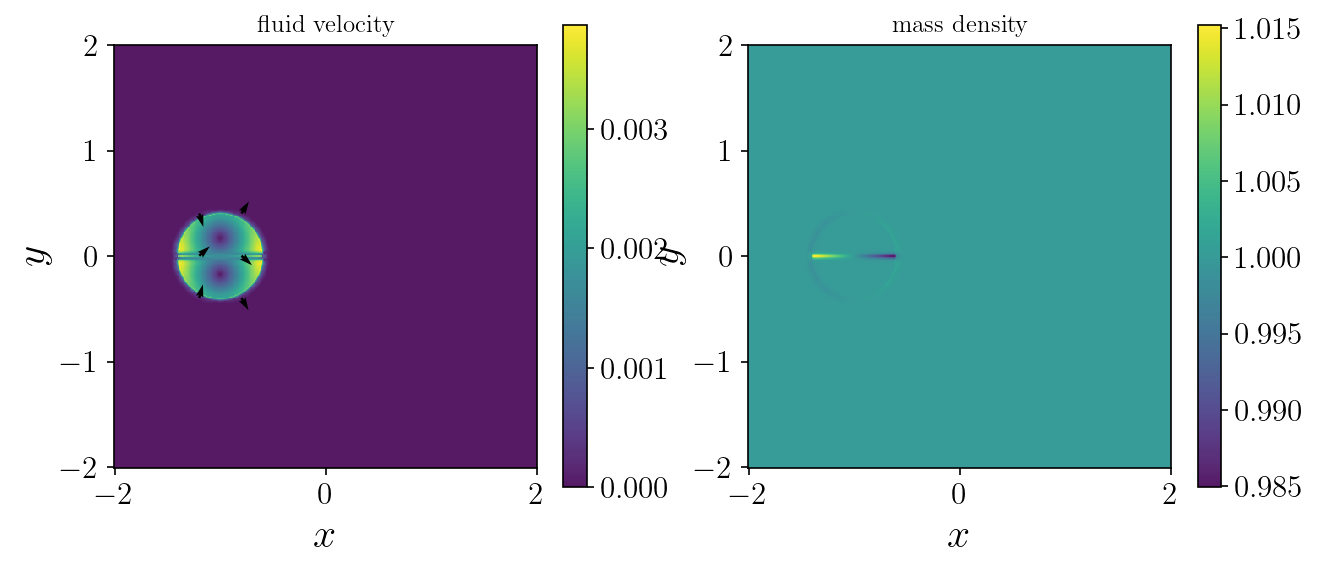

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

# Create a meshgrid for plotting
x_unique = fluidDf['coordinate_x'].unique()
y_unique = fluidDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

c = axes[0].pcolormesh(X, Y,
    np.sqrt(fluidDf.fluidVelocity_x**2 + fluidDf.fluidVelocity_y**2).unstack().values.transpose(),
    cmap = "viridis", alpha = 0.9
); cs.append(c);
axes[0].set_title('fluid velocity')

# Create a mask for filtering
quiverStep = int(len(x_unique)/10)
mask = (fluidDf['coordinate_x'].isin(x_unique[::quiverStep])) & (fluidDf['coordinate_y'].isin(y_unique[::quiverStep])) # & (
#     (fluidDf.fluidVelocity_x**2 + fluidDf.fluidVelocity_y**2 > 1e-10)
# )
# Filter the DataFrame
filtered_df = fluidDf[mask]

axes[0].quiver(
    filtered_df['coordinate_x'], 
    filtered_df['coordinate_y'], 
    (filtered_df.fluidVelocity_x / np.sqrt(filtered_df.fluidVelocity_x**2 + filtered_df.fluidVelocity_y**2)),
    (filtered_df.fluidVelocity_y / np.sqrt(filtered_df.fluidVelocity_x**2 + filtered_df.fluidVelocity_y**2)),
    scale = 30,
)

c = axes[1].pcolormesh(X,Y,
    fluidDf.massDensity.unstack().values.transpose(),
    vmin=min(fluidDf.massDensity.values),
    cmap = "viridis", alpha = 0.9
); cs.append(c);
axes[1].set_title('mass density')

for i in range(2):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    fig.colorbar(c, ax=ax, shrink=.8)  # 'shrink' adjusts the size, 'aspect' adjusts width

plt.show()

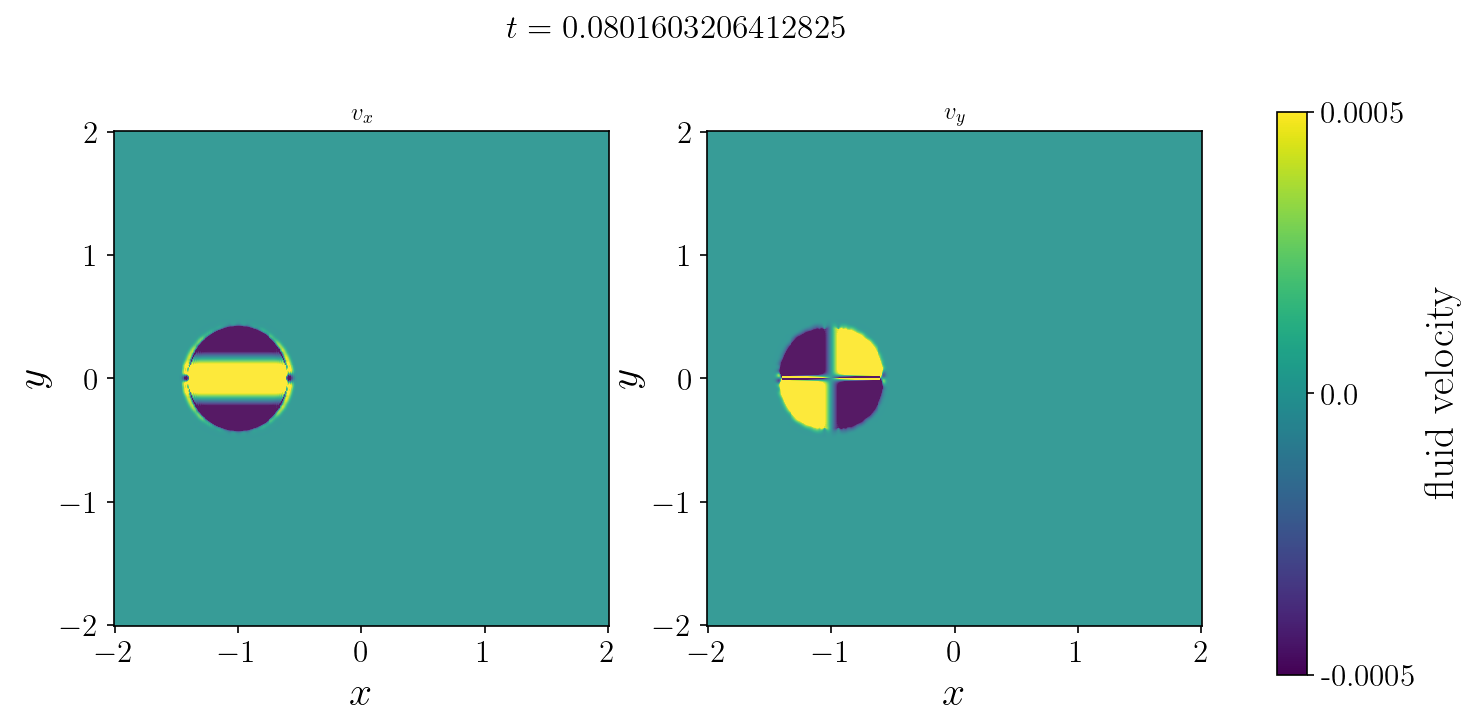

In [31]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

fig.suptitle(f"$t = {fluidDf['time'].values[-1]}$", fontsize=16)

upperLim = 0.5e-3
lowerLim = -0.5e-3

norm = plt.Normalize(lowerLim, upperLim)
cmap = plt.get_cmap('viridis')

# Create a meshgrid for plotting
x_unique = fluidDf['coordinate_x'].unique()
y_unique = fluidDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

c = axes[0].pcolormesh(X, Y,
    fluidDf.fluidVelocity_x.unstack().values.transpose(),
    vmin=lowerLim,
    vmax=upperLim,
    cmap = "viridis", alpha = 0.9
); cs.append(c);
axes[0].set_title('$v_x$')

c = axes[1].pcolormesh(X, Y,
    fluidDf.fluidVelocity_y.unstack().values.transpose(),
    vmin=lowerLim,
    vmax=upperLim,
    cmap = "viridis", alpha = 0.9
); cs.append(c);
axes[1].set_title('$v_y$')

for i in range(2):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

#oli
fig.subplots_adjust(right=0.85)  # Adjust the right space to make room for the colorbar
cbar_ax = fig.add_axes([0.9, 0.1, 0.02, 0.75])  # [left, bottom, width, height] for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label(label='fluid velocity',fontsize=20)
cbar.ax.tick_params(labelsize=15)

custom_ticks = np.array([lowerLim, 0, upperLim])
cbar.set_ticks(custom_ticks)
cbar.set_ticklabels(custom_ticks)

plt.show()

# Fluido al final

In [23]:
tick = particleDf.tick.values[-1]
fluidDf = pd.read_csv(dir + f"fluidTrj_{tick}.csv").set_index(["id_x","id_y"]).sort_index()

fluidDf

tick      time  coordinate_x  coordinate_y  massDensity  \
id_x id_y                                                            
1    1     7480  59.95992          -2.0     -2.000000     1.000290   
     2     7480  59.95992          -2.0     -1.991984     1.000290   
     3     7480  59.95992          -2.0     -1.983968     1.000290   
     4     7480  59.95992          -2.0     -1.975952     1.000290   
     5     7480  59.95992          -2.0     -1.967936     1.000289   
...         ...       ...           ...           ...          ...   
500  496   7480  59.95992           2.0      1.967936     1.000288   
     497   7480  59.95992           2.0      1.975952     1.000289   
     498   7480  59.95992           2.0      1.983968     1.000289   
     499   7480  59.95992           2.0      1.991984     1.000289   
     500   7480  59.95992           2.0      2.000000     1.000289   

           fluidVelocity_x  fluidVelocity_y        f1        f2        f3  \
id_x id_y                                                                   
1    1            0.000033    -1.976495e-07  0.444573  0.111154  0.111132   
     2            0.000033    -5.978956e-07  0.444573  0.111154  0.111132   
     3            0.000033    -1.019385e-06  0.444573  0.111154  0.111132   
     4            0.000033    -1.471298e-06  0.444573  0.111154  0.111132   
     5            0.000033    -1.968521e-06  0.444572  0.111154  0.111132   
...                    ...              ...       ...       ...       ...   
500  496          0.000034     1.992163e-06  0.444572  0.111154  0.111132   
     497          0.000034     1.494565e-06  0.444572  0.111154  0.111132   
     498          0.000034     1.038675e-06  0.444572  0.111155  0.111132   
     499          0.000034     6.105601e-07  0.444573  0.111155  0.111132   
     500          0.000034     2.020513e-07  0.444573  0.111155  0.111132   

                 f4        f5        f6        f7        f8        f9  
id_x id_y                                                              
1    1     0.111143  0.111143  0.027789  0.027783  0.027789  0.027783  
     2     0.111143  0.111144  0.027789  0.027783  0.027789  0.027783  
     3     0.111143  0.111144  0.027789  0.027783  0.027789  0.027783  
     4     0.111143  0.111144  0.027789  0.027783  0.027789  0.027783  
     5     0.111143  0.111144  0.027788  0.027783  0.027789  0.027783  
...             ...       ...       ...       ...       ...       ...  
500  496   0.111144  0.111143  0.027789  0.027783  0.027788  0.027783  
     497   0.111144  0.111143  0.027789  0.027783  0.027789  0.027783  
     498   0.111144  0.111143  0.027789  0.027783  0.027789  0.027783  
     499   0.111144  0.111143  0.027789  0.027783  0.027789  0.027783  
     500   0.111143  0.111143  0.027789  0.027783  0.027789  0.027783  

[250000 rows x 16 columns]

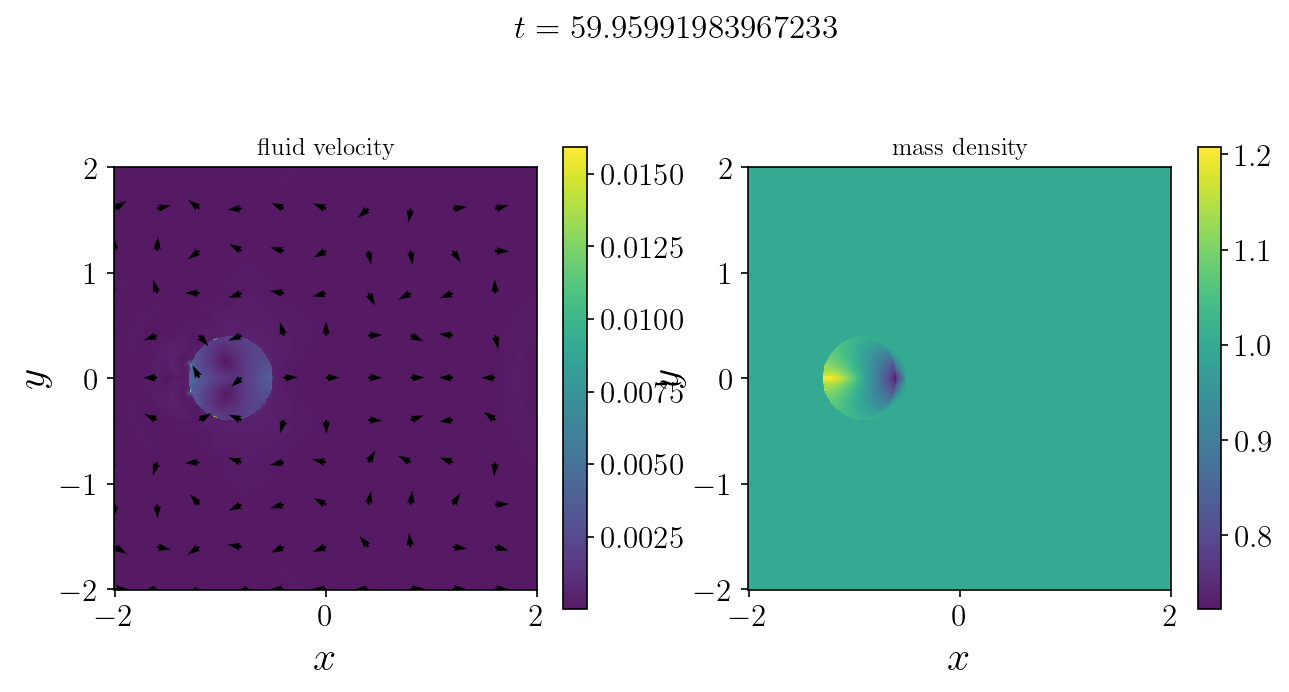

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

fig.suptitle(f"$t = {fluidDf['time'].values[-1]}$", fontsize=16)

# Create a meshgrid for plotting
x_unique = fluidDf['coordinate_x'].unique()
y_unique = fluidDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

c = axes[0].pcolormesh(X, Y,
    np.sqrt(fluidDf.fluidVelocity_x**2 + fluidDf.fluidVelocity_y**2).unstack().values.transpose(),
    cmap = "viridis", alpha = 0.9
); cs.append(c);
axes[0].set_title('fluid velocity')

# Create a mask for filtering
quiverStep = int(len(x_unique)/10)
mask = (fluidDf['coordinate_x'].isin(x_unique[::quiverStep])) & (fluidDf['coordinate_y'].isin(y_unique[::quiverStep])) # & (
#     (fluidDf.fluidVelocity_x**2 + fluidDf.fluidVelocity_y**2 > 1e-10)
# )
# Filter the DataFrame
filtered_df = fluidDf[mask]

axes[0].quiver(
    filtered_df['coordinate_x'], 
    filtered_df['coordinate_y'], 
    (filtered_df.fluidVelocity_x / np.sqrt(filtered_df.fluidVelocity_x**2 + filtered_df.fluidVelocity_y**2)),
    (filtered_df.fluidVelocity_y / np.sqrt(filtered_df.fluidVelocity_x**2 + filtered_df.fluidVelocity_y**2)),
    scale = 30,
)

c = axes[1].pcolormesh(X,Y,
    fluidDf.massDensity.unstack().values.transpose(),
    vmin=min(fluidDf.massDensity.values),
    cmap = "viridis", alpha = 0.9
); cs.append(c);
axes[1].set_title('mass density')

for i in range(2):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    fig.colorbar(c, ax=ax, shrink=.8)  # 'shrink' adjusts the size, 'aspect' adjusts width

plt.show()

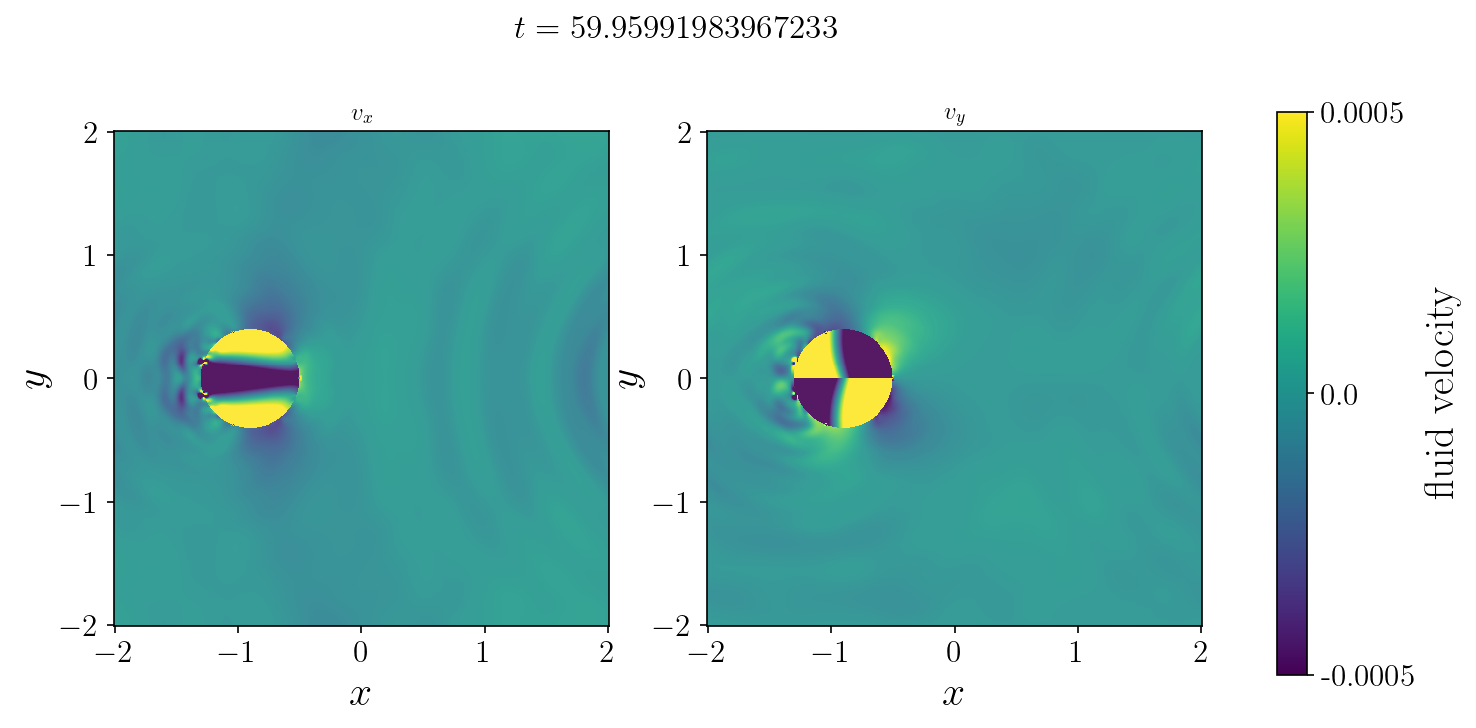

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

fig.suptitle(f"$t = {fluidDf['time'].values[-1]}$", fontsize=16)

upperLim = 0.5e-3
lowerLim = -0.5e-3

norm = plt.Normalize(lowerLim, upperLim)
cmap = plt.get_cmap('viridis')

# Create a meshgrid for plotting
x_unique = fluidDf['coordinate_x'].unique()
y_unique = fluidDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

c = axes[0].pcolormesh(X, Y,
    fluidDf.fluidVelocity_x.unstack().values.transpose(),
    vmin=lowerLim,
    vmax=upperLim,
    cmap = "viridis", alpha = 0.9
); cs.append(c);
axes[0].set_title('$v_x$')

c = axes[1].pcolormesh(X, Y,
    fluidDf.fluidVelocity_y.unstack().values.transpose(),
    vmin=lowerLim,
    vmax=upperLim,
    cmap = "viridis", alpha = 0.9
); cs.append(c);
axes[1].set_title('$v_y$')

for i in range(2):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

#oli
fig.subplots_adjust(right=0.85)  # Adjust the right space to make room for the colorbar
cbar_ax = fig.add_axes([0.9, 0.1, 0.02, 0.75])  # [left, bottom, width, height] for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label(label='fluid velocity',fontsize=20)
cbar.ax.tick_params(labelsize=15)

custom_ticks = np.array([lowerLim, 0, upperLim])
cbar.set_ticks(custom_ticks)
cbar.set_ticklabels(custom_ticks)

plt.show()

# Tensor de estrés

In [34]:
stressDf = pd.read_csv(dir + "stressTensor.csv").set_index(["id_x","id_y"]).sort_index()

stressDf

tick  time  coordinate_x  coordinate_y  component_xx  component_yx  \
id_x id_y                                                                       
1    1     7485  60.0          -2.0     -2.000000 -1.803588e-07 -2.433151e-09   
     2     7485  60.0          -2.0     -1.991984 -1.815179e-07 -7.419029e-09   
     3     7485  60.0          -2.0     -1.983968 -1.838055e-07 -1.275342e-08   
     4     7485  60.0          -2.0     -1.975952 -1.871617e-07 -1.865630e-08   
     5     7485  60.0          -2.0     -1.967936 -1.914981e-07 -2.531902e-08   
...         ...   ...           ...           ...           ...           ...   
500  496   7485  60.0           2.0      1.967936 -1.835179e-07  2.053768e-08   
     497   7485  60.0           2.0      1.975952 -1.791593e-07  1.480243e-08   
     498   7485  60.0           2.0      1.983968 -1.757898e-07  9.926839e-09   
     499   7485  60.0           2.0      1.991984 -1.734948e-07  5.693477e-09   
     500   7485  60.0           2.0      2.000000 -1.723326e-07  1.852820e-09   

           component_xy  component_yy  
id_x id_y                              
1    1    -2.433151e-09 -1.284073e-07  
     2    -7.419029e-09 -1.356945e-07  
     3    -1.275342e-08 -1.500537e-07  
     4    -1.865630e-08 -1.710602e-07  
     5    -2.531902e-08 -1.980929e-07  
...                 ...           ...  
500  496   2.053768e-08 -1.916454e-07  
     497   1.480243e-08 -1.655321e-07  
     498   9.926839e-09 -1.452492e-07  
     499   5.693477e-09 -1.313891e-07  
     500   1.852820e-09 -1.243565e-07  

[250000 rows x 8 columns]

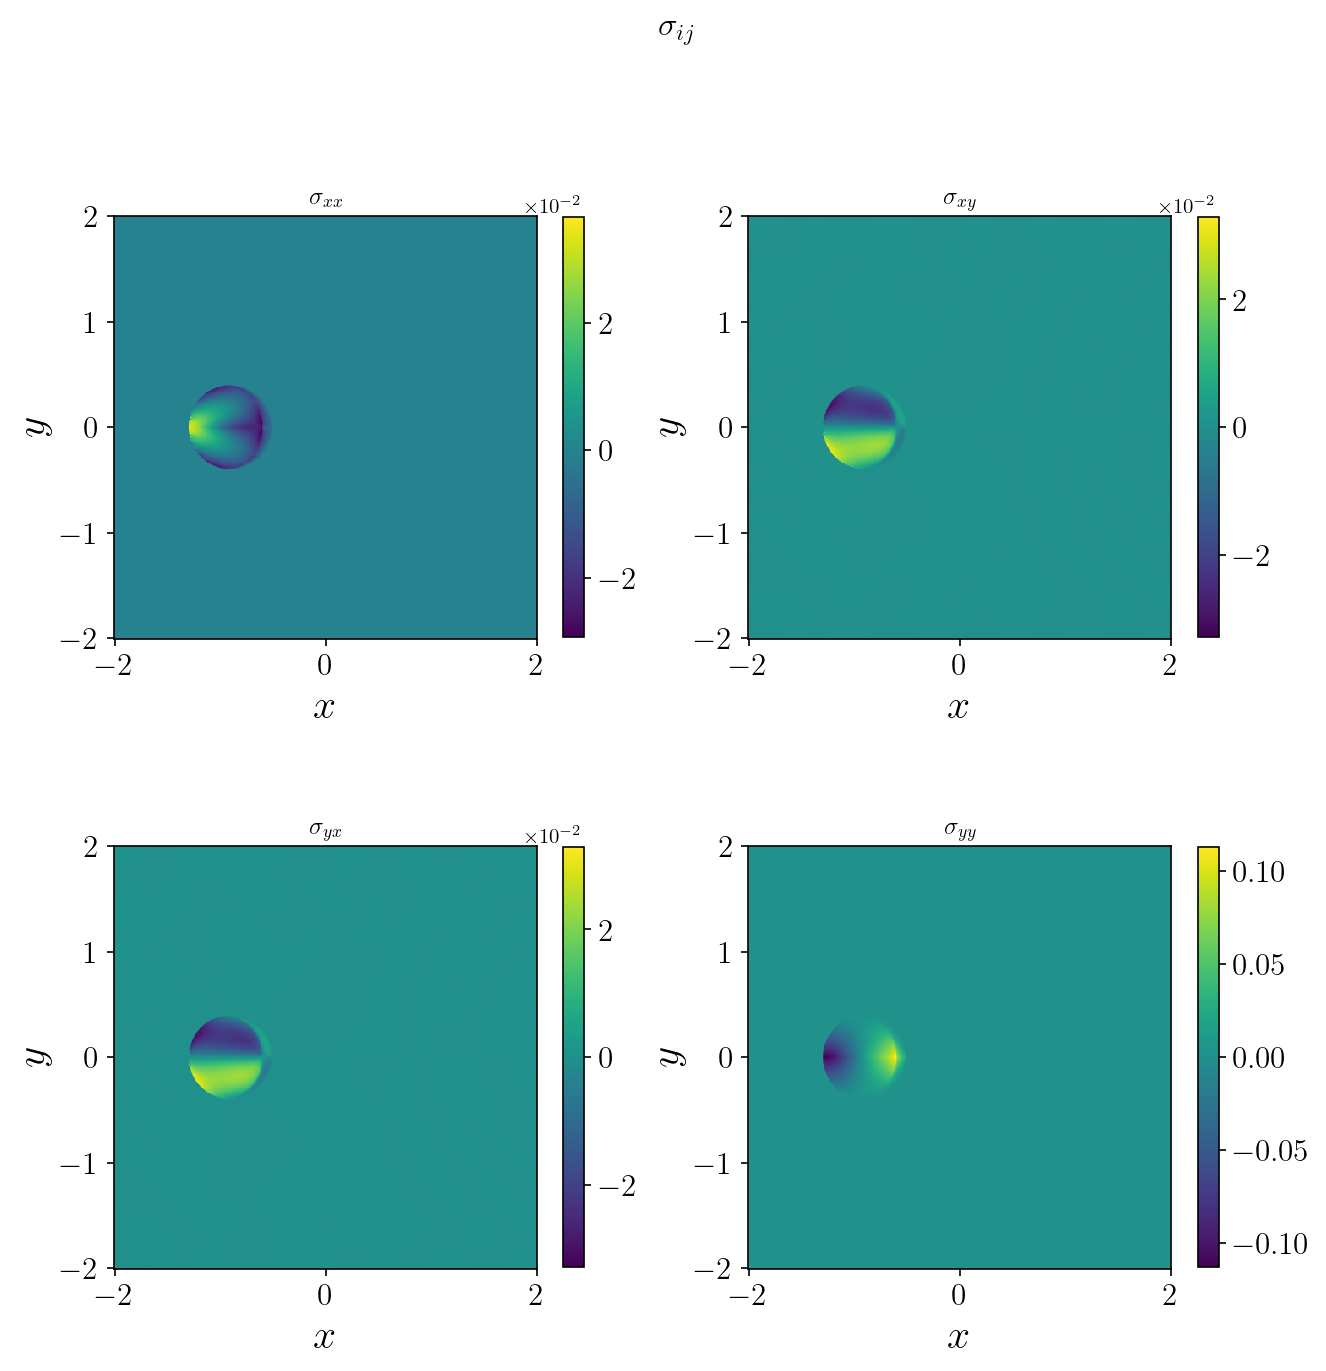

In [35]:
# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("$\\sigma_{ij}$", fontsize=16)

# Create a meshgrid for plotting
x_unique = stressDf['coordinate_x'].unique()
y_unique = stressDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

# plotting
c = axes[0,0].pcolormesh(X,Y,stressDf["component_xx"].unstack().values.transpose()); cs.append(c);
axes[0,0].set_title("$\\sigma_{xx}$")

c = axes[0,1].pcolormesh(X,Y,stressDf["component_xy"].unstack().values.transpose()); cs.append(c);
axes[0,1].set_title("$\\sigma_{xy}$")

c = axes[1,0].pcolormesh(X,Y,stressDf["component_yx"].unstack().values.transpose()); cs.append(c);
axes[1,0].set_title("$\\sigma_{yx}$")

c = axes[1,1].pcolormesh(X,Y,stressDf["component_yy"].unstack().values.transpose()); cs.append(c);
axes[1,1].set_title("$\\sigma_{yy}$")

# formatting
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  # Sets limits for when to use scientific notation

# for ax in axes.flat:
for i in range(4):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")    
    cbar = fig.colorbar(c, ax=ax, shrink=.8)
    cbar.ax.yaxis.set_major_formatter(formatter)
    cbar.ax.yaxis.get_offset_text().set_fontsize(10)  # Adjust the font size if necessary

plt.show()

In [36]:
radius = 0.4
position_X = particleDf.position_x.values[-1]
position_Y = particleDf.position_y.values[-1]

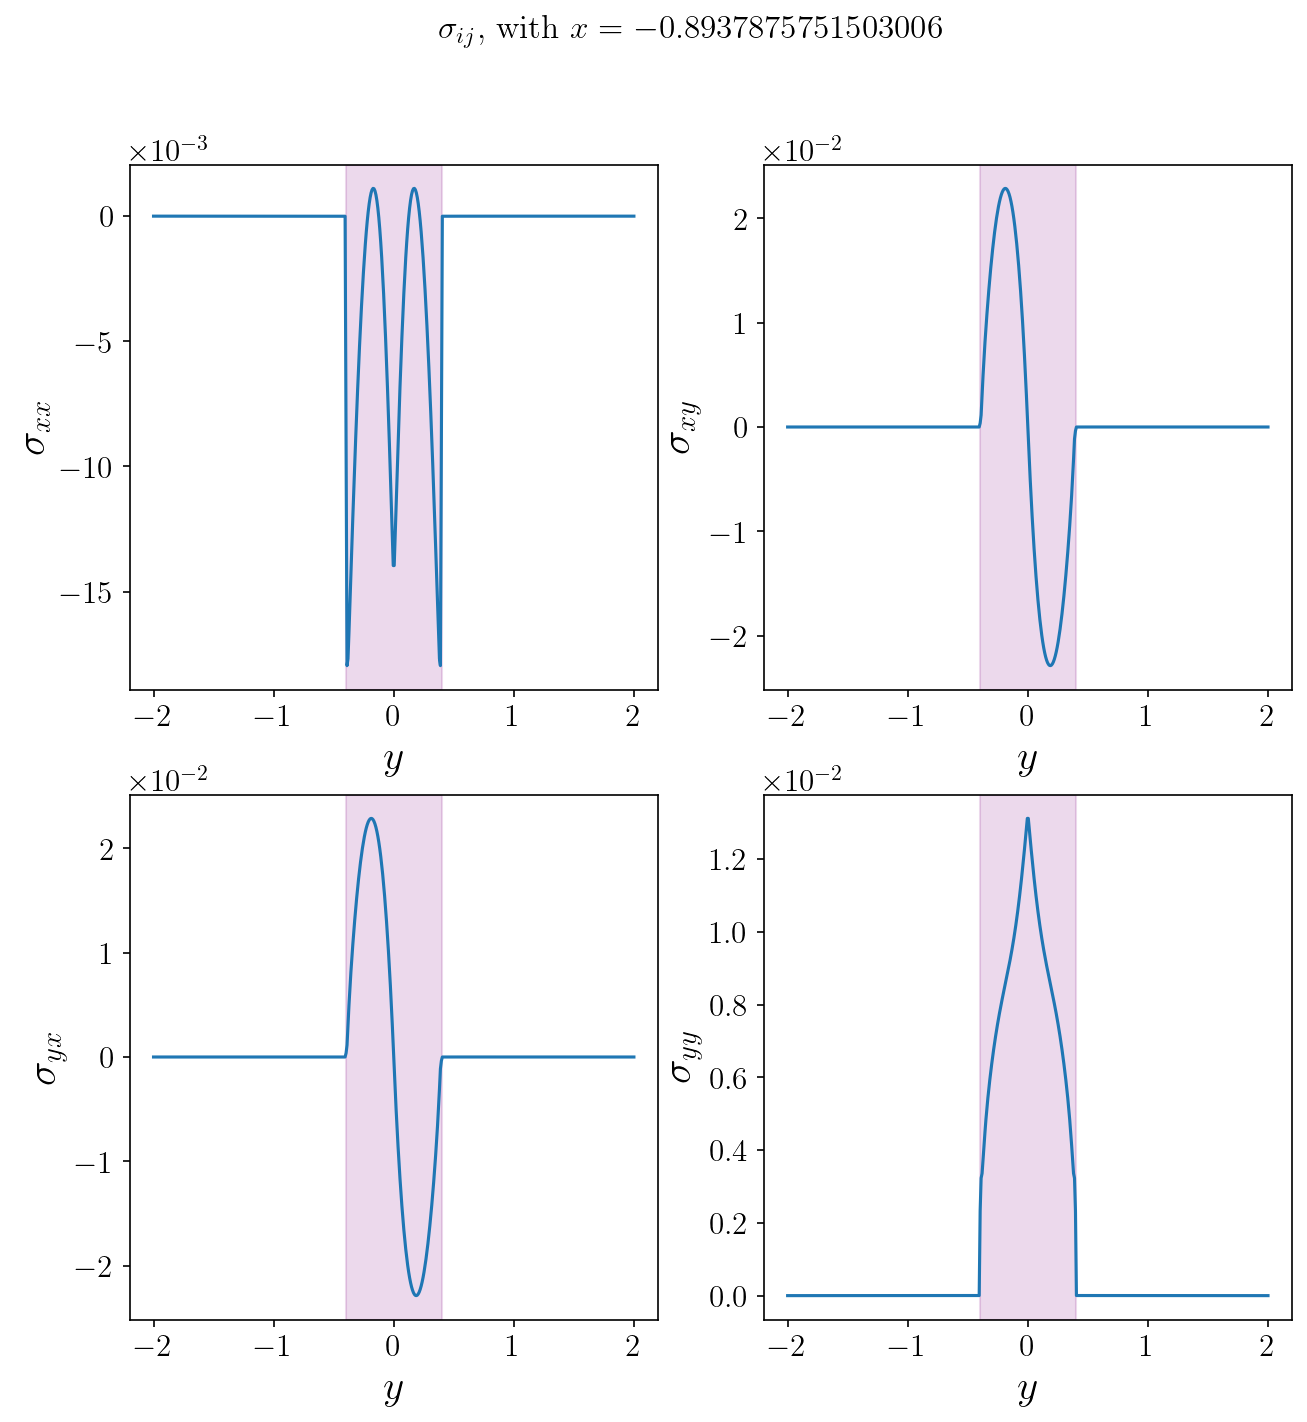

In [37]:
id = stressDf.query(f"coordinate_x >= {position_X}").reset_index().iloc[0].filter(["id_x"]).values[0]

# ploteo v_x(y, x = 0)
sigma_x = stressDf.loc[id].filter(["coordinate_y", "component_xx", "component_xy", "component_yx", "component_yy"])


# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("$\\sigma_{ij}$, with " f"$x = {stressDf.query(f"id_x == {id}").iloc[0].filter(["coordinate_x"]).values[0]}$", fontsize=16)

axes[0,0].plot(sigma_x.coordinate_y, sigma_x.component_xx) 
axes[0,0].set_ylabel("$\\sigma_{xx}$")    
axes[0,1].plot(sigma_x.coordinate_y, sigma_x.component_xy) 
axes[0,1].set_ylabel("$\\sigma_{xy}$")    
axes[1,0].plot(sigma_x.coordinate_y, sigma_x.component_yx) 
axes[1,0].set_ylabel("$\\sigma_{yx}$")    
axes[1,1].plot(sigma_x.coordinate_y, sigma_x.component_yy) 
axes[1,1].set_ylabel("$\\sigma_{yy}$")    

for ax in axes.flatten():
    ax.set_xlabel("$y$")
    ax.yaxis.set_major_formatter(formatter)
    ax.axvspan(position_Y-0.4, position_Y+0.4, color='purple', alpha=0.15)  # Shade the sphere

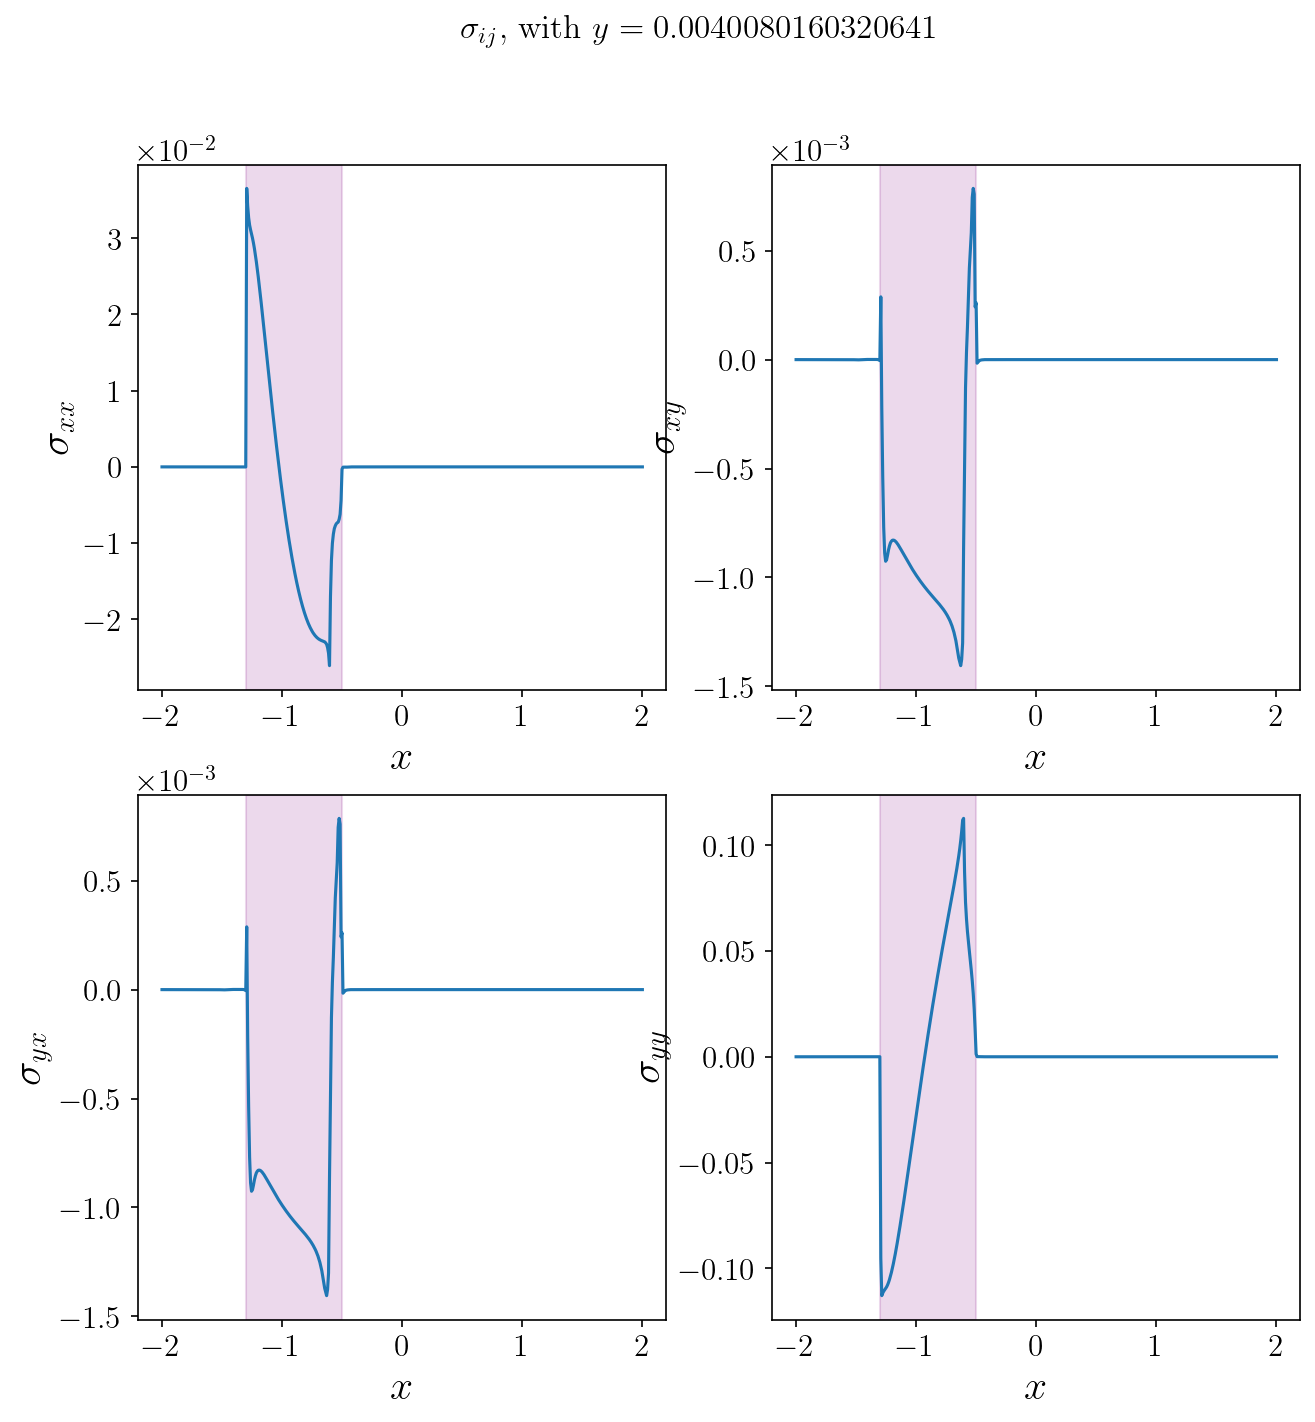

In [38]:
# encuentro el primer id_x tal que coordinate_y sea mayor o igual a la posición de la partícula
id = stressDf.query(f"coordinate_y >= {position_Y}").reset_index().iloc[0].filter(["id_y"]).values[0]

sigma_y = stressDf.query(f"id_y == {id}").filter(["coordinate_x", "component_xx", "component_xy", "component_yx", "component_yy"])


# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("$\\sigma_{ij}$, with " f"$y = {stressDf.query(f"id_y == {id}").iloc[0].filter(["coordinate_y"]).values[0]}$", fontsize=16)

axes[0,0].plot(sigma_y.coordinate_x, sigma_y.component_xx) 
axes[0,0].set_ylabel("$\\sigma_{xx}$")    
axes[0,1].plot(sigma_y.coordinate_x, sigma_y.component_xy) 
axes[0,1].set_ylabel("$\\sigma_{xy}$")    
axes[1,0].plot(sigma_y.coordinate_x, sigma_y.component_yx) 
axes[1,0].set_ylabel("$\\sigma_{yx}$")    
axes[1,1].plot(sigma_y.coordinate_x, sigma_y.component_yy) 
axes[1,1].set_ylabel("$\\sigma_{yy}$")    

for ax in axes.flatten():
    ax.set_xlabel("$x$")
    ax.yaxis.set_major_formatter(formatter)
    ax.axvspan(position_X-0.4, position_X+0.4, color='purple', alpha=0.15)  # Shade the sphere